# Proyecto Model Fitness

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

# Metodología

**1. Análisis del Comportamiento de los Clientes:** 

Revisaremos los datos históricos de asistencia al gimnasio para identificar patrones de comportamiento. Se evaluará la frecuencia de visitas, la duración promedio de la membresía y otros indicadores clave. Esto permitirá crear una línea base sobre el uso típico de los clientes antes de la pérdida.

**2. Modelado Predictivo de Pérdida de Clientes:**

Desarrollaremos un modelo de machine learning para predecir la probabilidad de pérdida de clientes en el próximo mes. Utilizaremos técnicas como regresión logística, árboles de decisión o modelos basados en redes neuronales, tomando en cuenta variables como la frecuencia de visitas, uso de instalaciones y duración de la membresía.

**3. Segmentación de Clientes:** 

Elaboraremos retratos de usuarios típicos mediante la segmentación de clientes. Identificaremos grupos clave según características como el nivel de actividad, tipo de membresía, y la frecuencia de interacción con los servicios. Esto permitirá descubrir a los usuarios más propensos a abandonar.

**4. Análisis de Factores Críticos:** 

Identificaremos los factores que más impactan la pérdida de clientes, como periodos prolongados sin visitas, cambios en los patrones de uso de las instalaciones o falta de interacción con los servicios adicionales. Se utilizarán análisis estadísticos para determinar cuáles de estos factores tienen mayor correlación con la rotación.

**5. Conclusiones y Recomendaciones:** 

Se presentarán conclusiones basadas en los resultados del modelo predictivo y el análisis de factores. Ofreceremos recomendaciones para mejorar la retención de clientes, como estrategias de reactivación para grupos en riesgo, mejoras en la atención personalizada y ofertas de valor. Además, se sugerirán campañas dirigidas para reducir la rotación y fomentar la fidelización.

# Preparación de Datos

Importamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv("/datasets/gym_churn_us.csv")

Una vez importado los datos y cargadas las librerías, revisemos si están aptos para lo que requiere nuestro análisis 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
data.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**Observaciones** 

   - A simple vista no contamos con datos nulos. Gran parte de los datos son números o categorícos la cual da confianza de que no hayan 'falsos no nulos' o errores en el ingreso de los datos
   
    
   - Nombres de la columnas necestian modifcarse, tienen nombres con muchas letras mayúsculas, la cual dificulta su escritura en código. 
   
    

Se cambiará los nombres de columnas a mínusculas 

In [5]:
new_cols = []

for old in data.columns:
    lower = old.lower()
    new_cols.append(lower)
    
data.columns = new_cols

print(data.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


Revisemos de cerca los datos

In [6]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Observaciones:**


-  Todas las columnas contienen información categórica, ya convertida en etiquetas binarias.


-  La edad promedio de los usuarios es de 29 años, con una edad mínima de 18 años y una máxima de 41 años.


-  La mayoría de los usuarios ha estado en el gimnasio durante aproximadamente 3 a 4 meses.


-  La gran parte de los usuarios asiste al gimnasio una vez por semana.


-  En promedio, a los usuarios les quedan aproximadamente 4 meses para que finalice su contrato.


**Con base en esta información:**

-  Se agruparán los datos por Churn para analizar las características promedio de dos grupos: aquellos que cancelaron y aquellos que continuaron.


-  Se crearán histogramas de barras y distribuciones de características para ambos grupos (los que se fueron y los que se quedaron).

Ahora nos elaboraremos histogramas y gráficos de distribución para comparar en detalle las cancelaciones según sus características, agrupados por el promedio de cancelaciones 

         gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.0

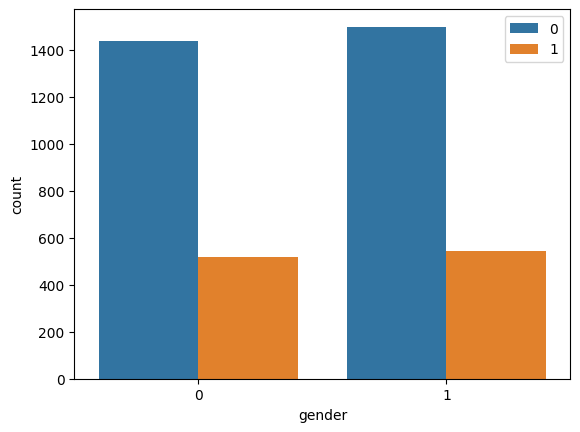

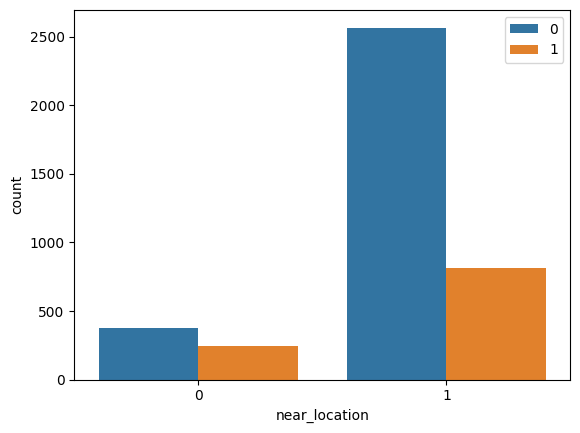

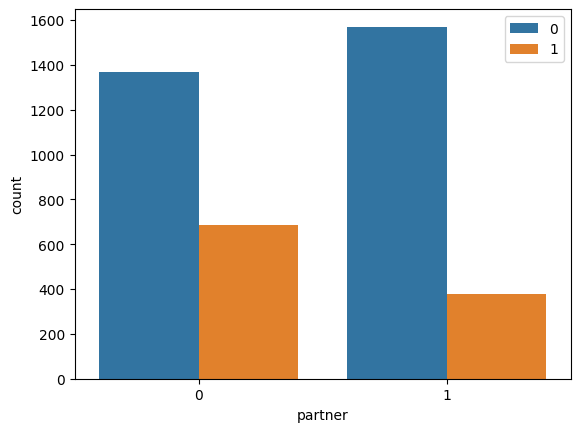

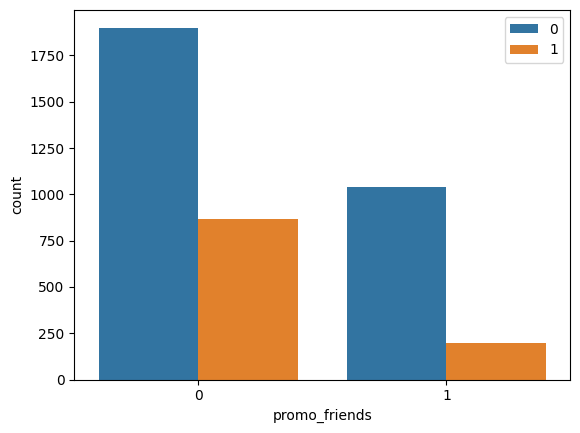

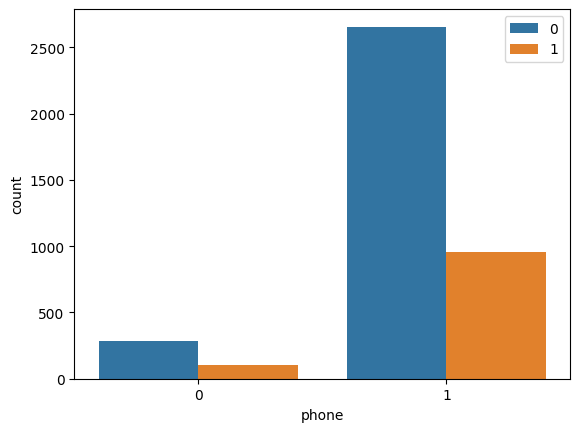

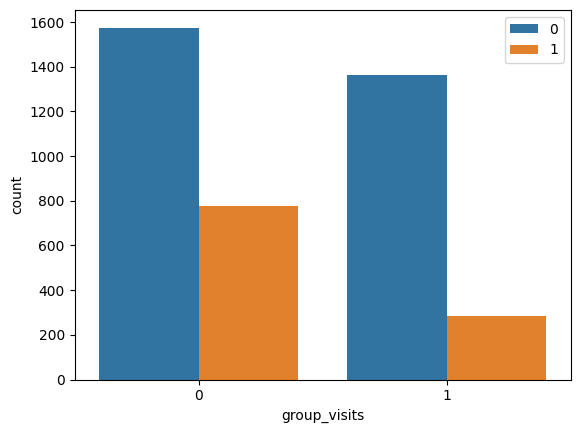

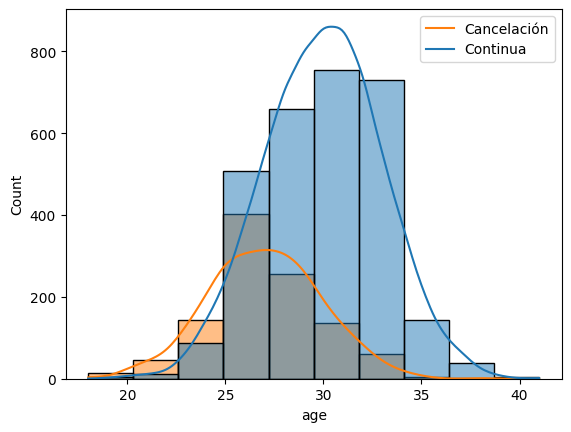

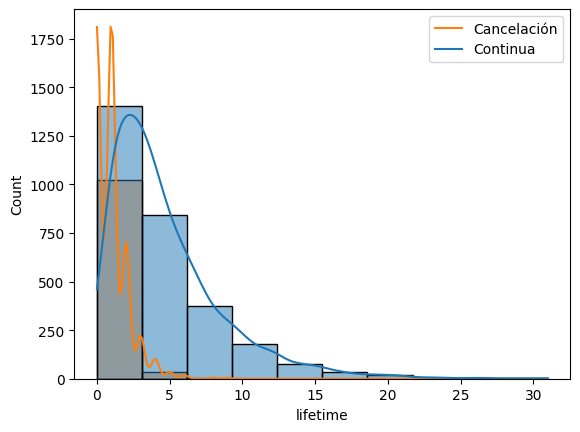

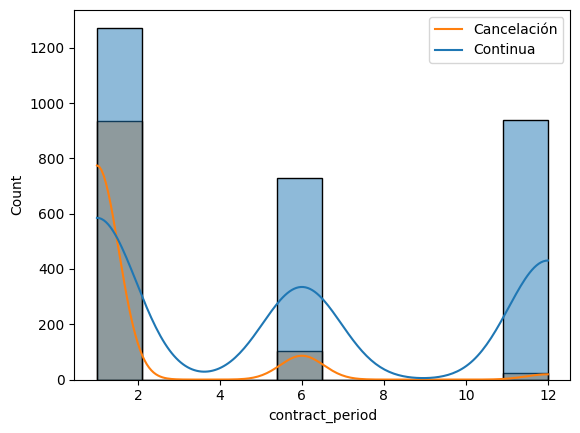

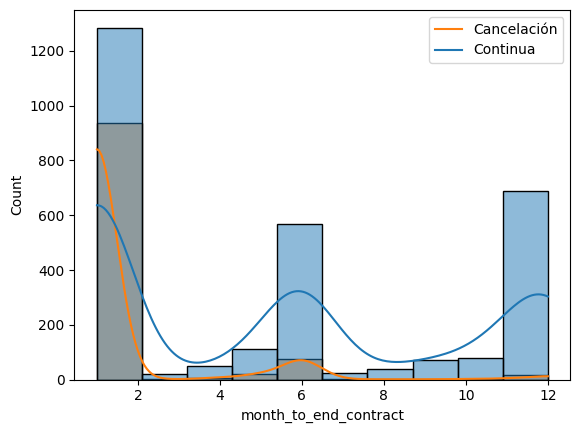

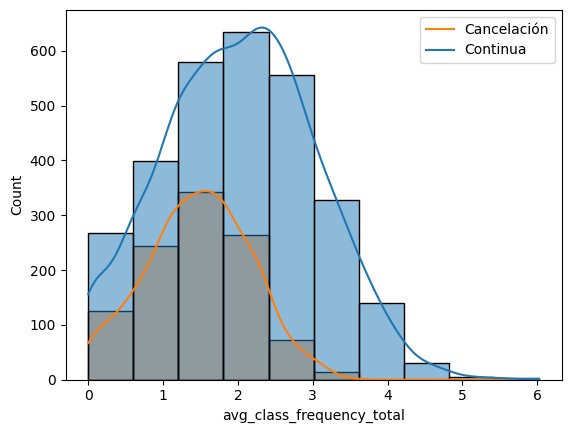

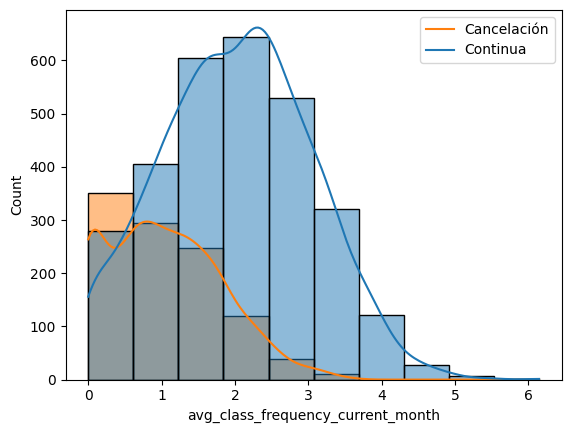

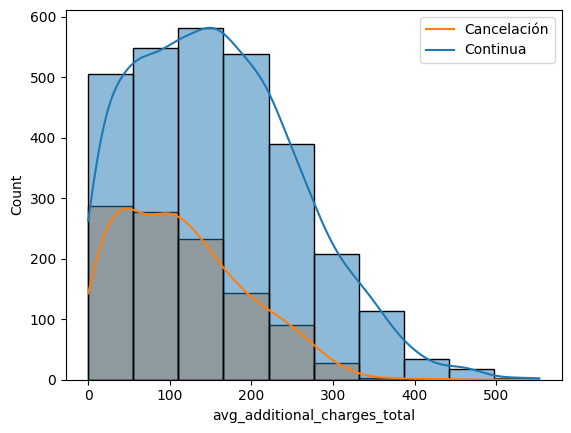

In [7]:
# Agrupando por "Churn"

churn_users = data.groupby('churn').mean()
print(churn_users)

# Creamos listas tomando en cuenta las características binarias y las características con valores continuos
binary_char = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits' ]
continue_char = ['age', 'lifetime', 'contract_period', 'month_to_end_contract', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']

# Creando gráficas de barras de las características binarias
for char in binary_char:
    sns.countplot(data= data, x=char, hue=data['churn'])
    plt.legend()
    plt.show()

# Gráficando histogramas de las características continuas
for char in continue_char:
    sns.histplot(data = data, x=char, bins = 10, kde=True, hue='churn')
    plt.legend(labels=['Cancelación', 'Continua'])
    plt.show()

Observaciones:

-  Los usuarios que se inscriben sin aprovechar descuentos de compañías asociadas tienden a cancelar más frecuentemente que aquellos con descuentos.


-  Los usuarios que utilizan la promoción de "trae a un amigo" cancelan menos que los que no la usan.


-  Los usuarios con contratos de 1 mes tienen una mayor probabilidad de cancelar.


-  Los usuarios de entre 20 y 30 años son más propensos a cancelar.


-  Los usuarios con un mes restante en su contrato tienden a cancelar.


-  Los usuarios que cancelan suelen hacerlo en los primeros meses de su contrato.


-  Los usuarios que asisten al gimnasio de 1 a 3 veces por semana son más propensos a cancelar.


-  Los usuarios que no asistieron al gimnasio en el último mes tienden a cancelar.

A continuación crearemos una matriz de correlación para así identificar relaciones entre variables y detectar posibles casos de multicolinealidad, que pueden complicar el entrenamiento del modelo predictivo que vamos a emplear

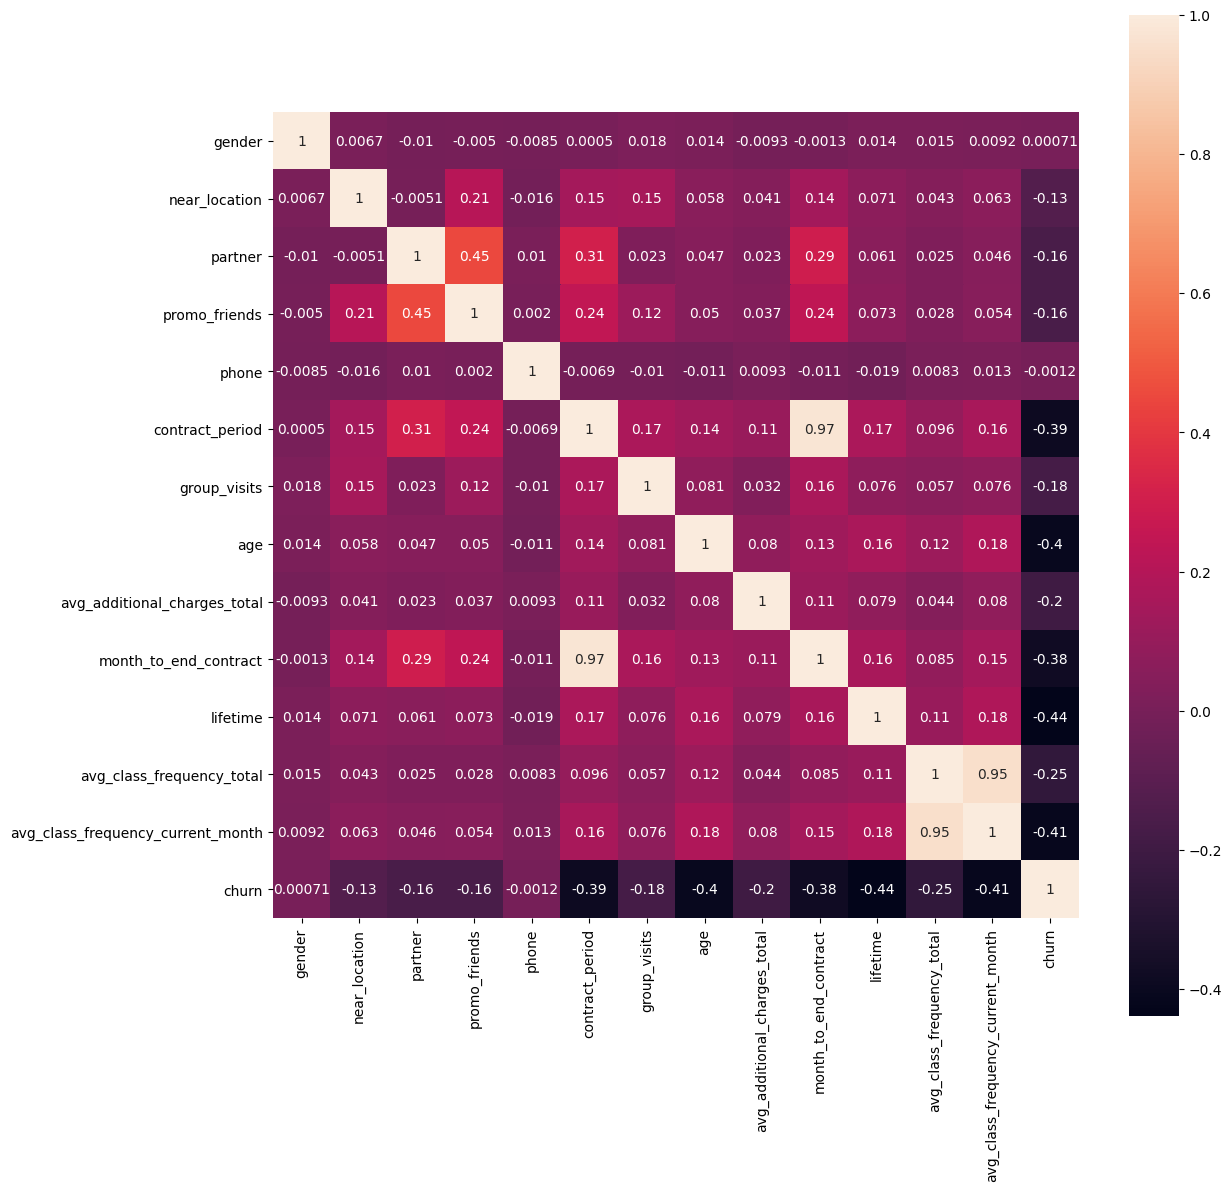

In [8]:
# Matriz de relación
cm = data.corr()

# Mapa de calor anotado para la matriz de correlación
plt.figure(figsize=(13,13))
sns.heatmap(cm, annot = True, square=True)
plt.show()

Como podemos observar, aparte de la característica de la edad, no hay muchas variables que tengan una correlación fuerte con "Churn". No obstante, se puede apreciar una alta correlación entre las variables `avg_class_frequency_total` y `Avg_class_frequency_current_month`, así como entre `Contract_period` y `Month_to_end_contract`. Sería conveniente eliminar algunas de estas características que están fuertemente relacionadas para evitar problemas al entrenar el modelo.

# Modelo para Predecir La Cancelación de Usuarios

En esta sección, desarrollaremos un modelo de clasificación binaria para predecir el comportamiento de los clientes, donde la variable objetivo es el *Churn*, es decir, la probabilidad de que un usuario cancele su membresía en el mes siguiente.

Para ello, se crearán dos modelos utilizando diferentes enfoques:

-  Regresión Logística


-  Bosque Aleatorio


Para evaluar la efectividad de estos modelos, utilizaremos métricas como **Exactitud, Precisión y Recall**. A partir de estos resultados, determinaremos cuál de los dos modelos presenta un mejor desempeño.

Además, dado que en la sección anterior observamos una correlación significativa entre las variables `Avg_class_frequency_total` y `Avg_class_frequency_current_month`, así como entre `Contract_period` y `Month_to_end_contract`, procederemos a eliminar una de estas variables para evitar posibles problemas durante el entrenamiento del modelo.

In [9]:
# Eliminamos columnas 

print('Tamaño de datos', data.shape)

print('------------------------------')

data_ = data.drop(['avg_class_frequency_total', 'month_to_end_contract'], axis = 1)

display(data_.head(5))

print('Tamaño de datos filtrados', data_.shape)


Tamaño de datos (4000, 14)
------------------------------


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0


Tamaño de datos filtrados (4000, 12)


Ahora comencemos con el desarrollo de modelos:

Primer paso, dividir los datos, las características como varibale *'X'* y la variable objetivo como *'Y'*, y establecerlos como conjuntos de datos de entrenamiento y prueba con la función `train_test_split()`

In [10]:
# Variables 'X' y 'Y'

X = data_.drop('churn', axis = 1)
y = data_['churn']

# Se dividen los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

Ahora, estandarizaremos los datos utilizando `StandardScaler`, que normaliza las características para que tengan una media de 0 y una desviación estándar de 1. Esto es importante para mejorar el rendimiento del modelo, especialmente si las características tienen diferentes escalas.

In [11]:
# Entrenamos StandardScaler en el conjunto de entrenamiento

scaler = StandardScaler()
scaler.fit(X_train)

# Transformamos conjuntos de entrenamiento y de prueba 
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Ya hecho la estandariación de datos, es ideal definir una función que calcule y muestre las métricas de rendimiento de un modelo de clasificación, como la exactitud, precisión y recall. Estas métricas son esenciales para evaluar el desempeño del modelo en sus predicciones.

In [1]:
# Definimos  función

def print_all_metrics(y_true, y_pred, y_proba, tittle = 'Métricas de clasificación'):
    print(tittle)
    print('\tExactitud: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

Siguiente paso, entrenar los modelos

# Modelo de Regresión Lógistica y Bosque Aleatorio

Se usará el Modelo de Regresión Logística para predecir si un cliente cancelará su suscripción. Luego, utilizaremos el modelo entrenado para hacer predicciones y mostrar las métricas de rendimiento, como la exactitud, precisión y recall, utilizando la función previamente definida.

In [13]:
# Definimos el algoritmo

lr_model = LogisticRegression(random_state = 0)

# Entrenamos el modelo

lr_model.fit(X_train_st, y_train)

# Utilizamos el modelo entrenado para hacer previsiones

lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]



print_all_metrics(y_test, lr_predictions, lr_probabilities, tittle='Métricas de Regresión Lineal')

Métricas de Regresión Lineal
	Exactitud: 0.90
	Precision: 0.79
	Recall: 0.82


También tenemos el Modelo de Bosque Aleatorio para predecir la cancelación de clientes. Después de entrenar el modelo, se realizan predicciones utilizando el conjunto de datos de prueba, y se evaluará el rendimiento del modelo con las métricas previamente definidas.

In [14]:
# Definimos el algoritmo

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenamos 

rf_model.fit(X_train_st, y_train)

# Utilizamos el modelo entrenado para hacer previsiones

rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]



print_all_metrics(y_test, rf_predictions, rf_probabilities, tittle="Métricas de Bosque Aleatorio")

Métricas de Bosque Aleatorio
	Exactitud: 0.90
	Precision: 0.81
	Recall: 0.75


A partir de los resultados obtenidos, podemos concluir lo siguiente:

**Exactitud:** Ambos modelos, la Regresión Logística y el Bosque Aleatorio, tienen la misma exactitud del 90%. Clasifican correctamente el 90% de los casos en el conjunto de prueba.

**Precisión:** El modelo de Bosque Aleatorio tiene una mejor precisión (0.81) en comparación con la Regresión Logística (0.79).  Bosque Aleatorio es ligeramente mejor al predecir con exactitud los casos positivos (**clientes que cancelarán**), minimizando los falsos positivos.

**Recall:** La Regresión Logística tiene un mejor recall (0.82) frente al Bosque Aleatorio (0.75). La Regresión Logística es más efectiva identificando a todos los clientes que realmente cancelarán, minimizando los falsos negativos.

**Conclusión general:** Aunque ambos modelos tienen la misma exactitud, la Regresión Logística será mejor en detectar correctamente a los clientes que cancelarán (mayor recall), mientras que el Bosque Aleatorio será mejor al predecir con mayor precisión esos casos (mayor precisión).

Dado que el **objetivo principal es maximizar la retención de clientes y minimizar la pérdida**, la Regresión Logística es el modelo más adecuado debido a su mayor sensibilidad. Este modelo permite identificar una mayor cantidad de clientes que tienen riesgo de cancelar, lo que facilita la implementación de estrategias proactivas para retenerlos.

# Crear Clusters de Usuarios

En esta sección, nos enfocaremos en la creación de clústeres de usuarios para segmentarlos de manera más efectiva. El objetivo es identificar patrones entre los diferentes grupos y entender qué características están asociadas con la cancelación o la permanencia de los clientes. Para lograr esto:

-  **Estandarización de los datos:** Se estandarizan las características de los usuarios para garantizar que todas las variables tengan el mismo peso en el análisis.


-  **Creación de un dendrograma:** Utilizando la función linkage(), se generará una matriz de distancias que nos permitirá visualizar un dendrograma, con el fin de estimar el número adecuado de clústeres para este proyecto.


-  **Entrenamiento del modelo de clustering:** Basado en el análisis del dendrograma, se entrenará un modelo de clustering con el algoritmo K-means, seleccionando un número de clústeres igual a 5 para facilitar la comparación.


-  **Análisis de los clústeres:** Observaremos los valores medios de las características de cada clúster, trazaremos sus distribuciones y calcularemos la tasa de cancelación para cada grupo. Esto nos permitirá identificar qué grupos son más propensos a cancelar su membresía y cuáles son más leales.


Este proceso nos ayudará a comprender mejor el comportamiento de los usuarios y a diseñar estrategias de retención más específicas.

# Dendograma

En este paso, vamos a realizar la estandarización de los datos y crear un dendrograma para visualizar la agrupación jerárquica de los usuarios. El propósito es identificar el número ideal de clústeres en los que podremos dividir a los clientes.

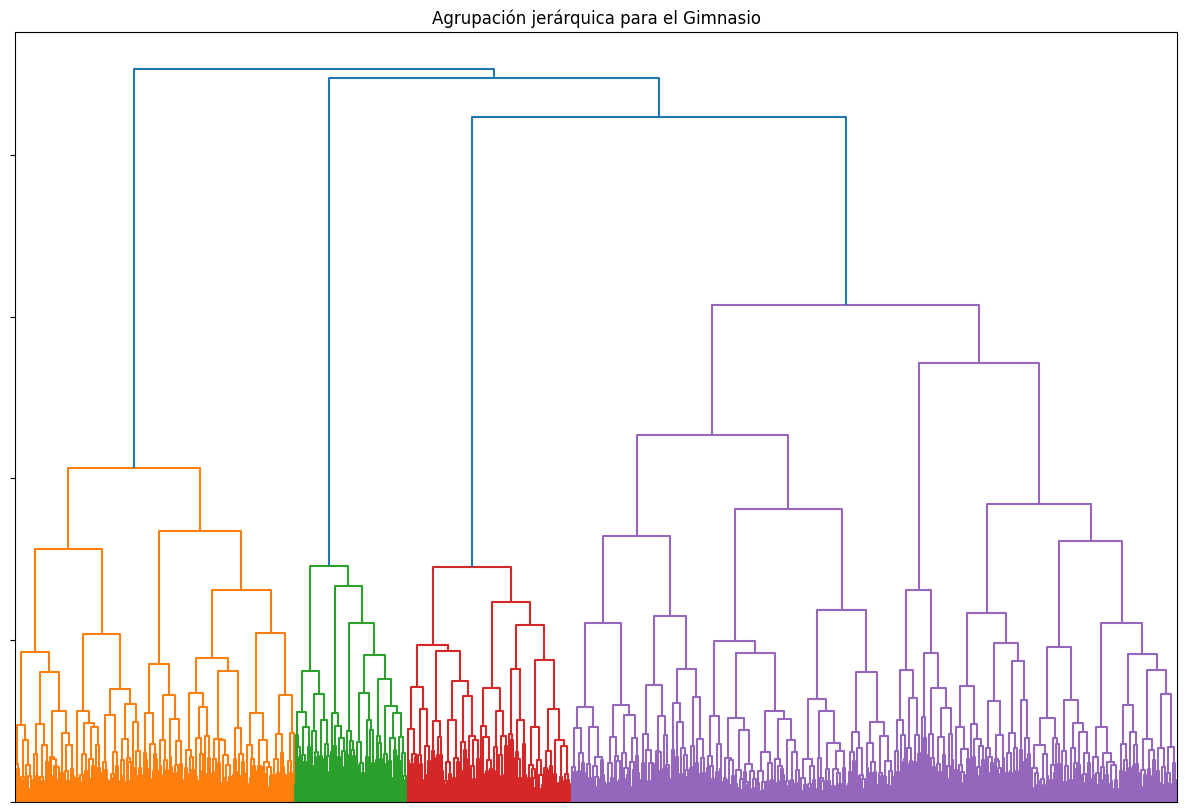

In [15]:
# Estandarización de los datos

sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

# Trazamos el gráfico

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para el Gimnasio')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()


El resultado sugiere utilizar cuatro grupos (representados por los cuatro colores al final de las ramas), pero decidiremos establecer el número de clústeres en 5, debido a la gran cantidad que abarca el grupo violeta (derecha),para así tener una mejor representación de subgrupos dentro de los datos, capturando diferencias significativas entre ellos sin perder detalle en la segmentación.

# Modelo K-Means

Se va a alicar este algoritmo para segmentar los usuarios en 5 grupos y almacenar esta información en el conjunto de datos

In [16]:
# Definimos el modelo de K-Means con 5 clusters

km = KMeans(n_clusters=5)

# Predice los clusters para las observaciones

labels = km.fit_predict(X_sc)

# Almacenamos las etiquetas de cluster en el campo de nuestro conjunto de datos

data_['cluster_km'] = labels


data_.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0,3


Todo listo para su obeservación 

# Observación de Los Clusters

En esta parte, analizaremos los clústeres obtenidos del modelo K-Means:

**Valores medios por clúster:** Veremos las características promedio de cada grupo para identificar patrones.
    
    
**Distribuciones de características:** Visualizaremos cómo se distribuyen las características en cada clúster.
    
    
**Tasa de cancelación:** Calcularemos la tasa de cancelación por clúster para determinar qué grupos son más propensos a cancelar y cuáles son más leales.
Este análisis nos ayudará a entender mejor el comportamiento de los usuarios en cada segmento.

In [20]:
# Agrupamos por cluster y veamos los valores medios

clusters = data_.groupby('cluster_km').mean().reset_index()

clusters.sort_values(by='churn', ascending=False)

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
1,1,0.499553,1.000000,0.198391,0.066130,1.0,1.953530,0.305630,27.762288,122.749201,1.970509,1.247144,0.536193
4,4,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
0,0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839
3,3,0.497976,0.995951,0.893725,1.000000,1.0,6.899798,0.523279,29.579960,153.007587,4.263158,1.915872,0.123482
2,2,0.536354,0.995785,0.407798,0.010537,1.0,6.540569,0.521602,30.699684,176.044812,5.585880,2.342584,0.011591


Vemos ahora los detalles de las características

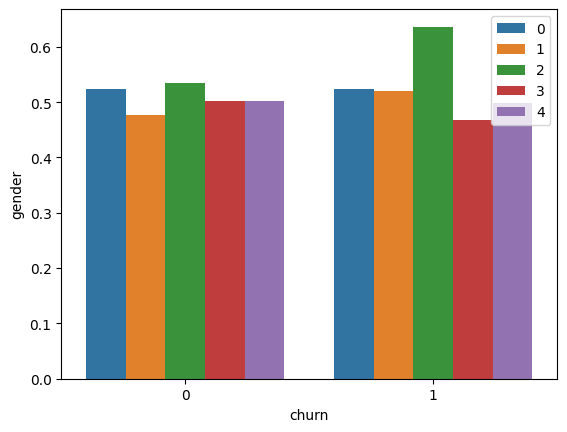

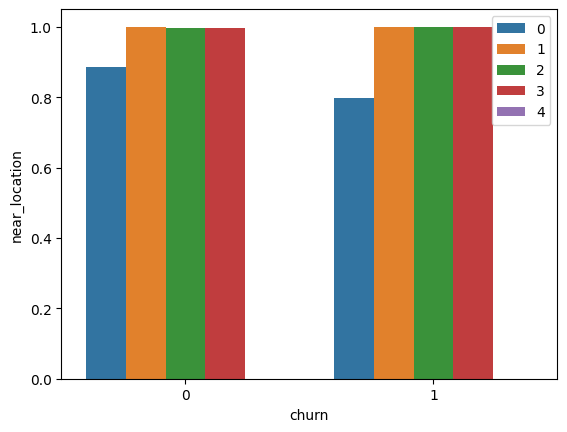

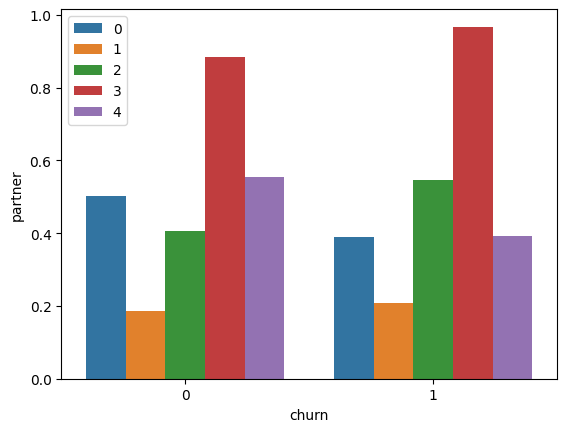

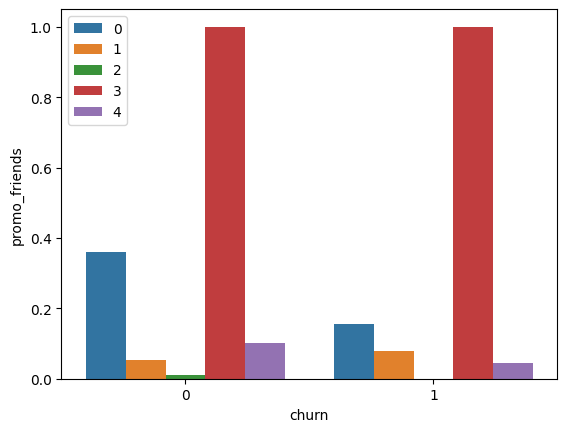

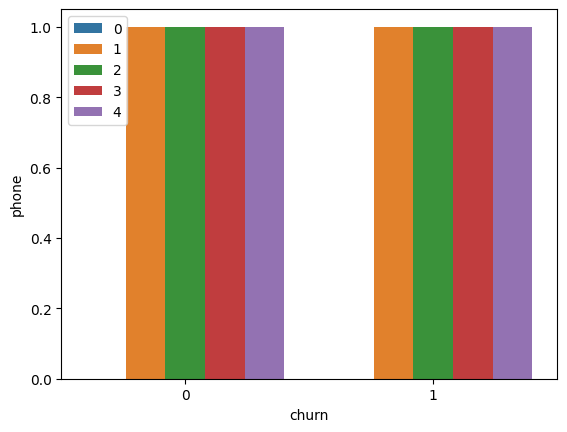

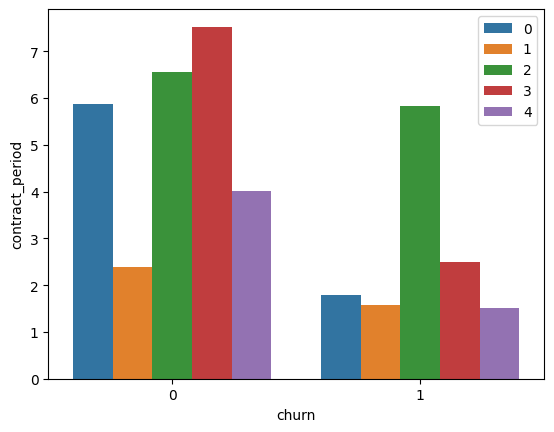

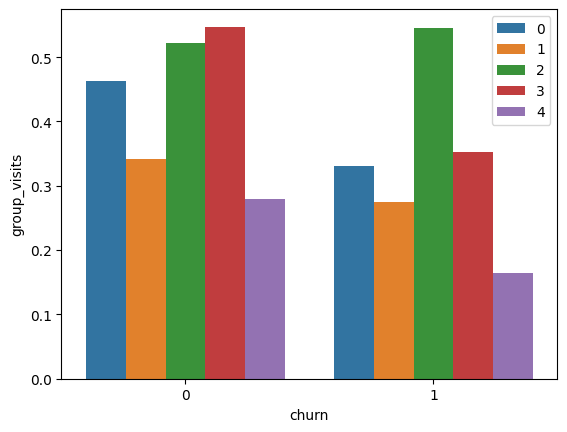

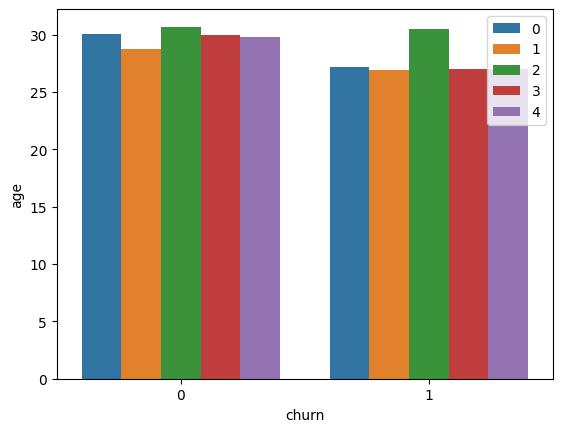

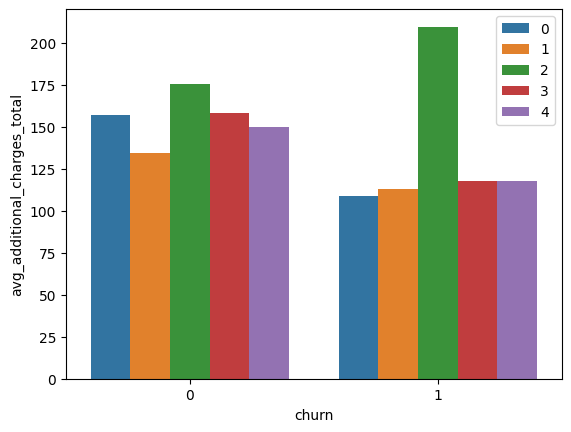

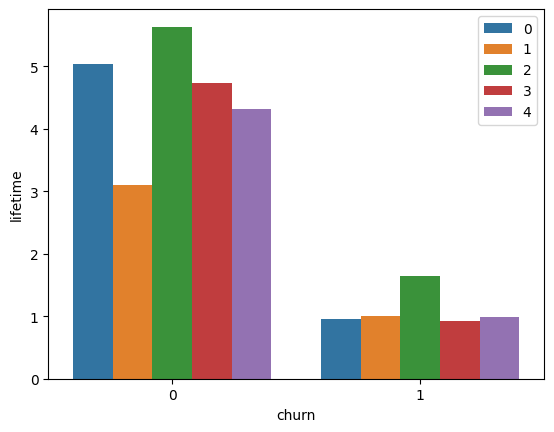

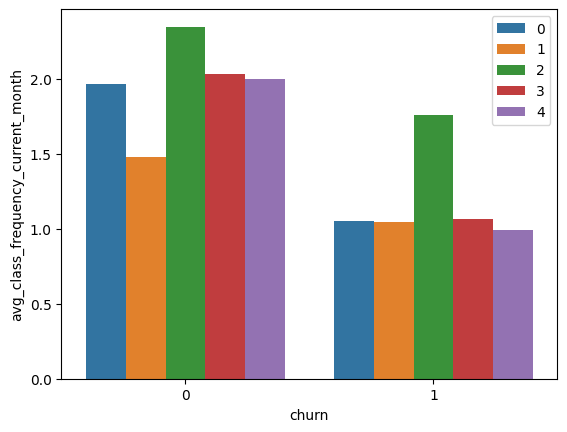

In [21]:
# Agrupando información por churn y cluster

clusters_churn = data_.groupby(['churn', 'cluster_km']).mean().reset_index()

# Gráficando los valores medios de cada característica por cluster y por churn

for characteristic in clusters_churn.drop(['cluster_km', 'churn'], axis=1).columns:
    sns.barplot(data=clusters_churn, x='churn', y=characteristic, hue='cluster_km')
    plt.legend()
    plt.show()

Por último, la tasa de candelación de cada cluster

In [22]:
clusters[['cluster_km','churn']].sort_values(by='churn',ascending=False)

,cluster_km,churn
1,1,0.536193
4,4,0.403226
0,0,0.266839
3,3,0.123482
2,2,0.011591


# Conclusiones

**Clúster 1 y 4:** tiene la mayor tasa de cancelación, con un 53.62% en el Cluster 1 y un 40,32% en el Cluster 4. Este grupo es el más propenso a cancelar sus membresías, lo que indica que se podría investigar más sobre sus características para entender mejor su comportamiento.


**Clúster 0 y 3:** presenta una tasa de cancelación relativamente baja en comparación a los primeros 2. El cluster 0 representa el 26.68% y el cluster 3 representa el 12.35%, lo que lo ubica en una posición intermedia.


**Clúster 2:** muestra la tasa de cancelación más baja, con solo un 1.16%. Este grupo se destaca por su alta retención y lealtad, lo que lo convierte en un segmento clave para enfocar estrategias de fidelización.

En resumen, los clústeres 1 y 4 son los más propensos a cancelar, mientras que los clústeres 3 y 2 representan los grupos más leales.

- Los grupos más leales tienen contratos más extensos, suelen pertenecer a los segmentos de mayor edad, participan con mayor frecuencia en clases grupales y son los clientes con más tiempo en el gimnasio.


- Los usuarios más propensos a cancelar tienden a tener contratos de corta duración (1 a 3 meses), no suelen inscribirse a través de compañías asociadas, participan menos en actividades grupales y tienden a cancelar alrededor del segundo mes de su membresía.

# Recomendaciones Cliente

Recomendaciones para retener clientes:

- Promover contratos más largos ofreciendo descuentos y beneficios adicionales.


- Fomentar clases grupales mediante incentivos para aumentar la participación y retención.


- Atender a nuevos usuarios con un programa de bienvenida que les brinde apoyo en los primeros meses.


- Ampliar asociaciones corporativas para ofrecer planes especiales que generen mayor fidelidad.


Estas estrategias ayudarán a mejorar la retención de clientes y fortalecer su compromiso con el gimnasio.